In [1]:
%matplotlib inline

# import all modules
import sys
import os
import itertools

import IPython.display as ipd
from python_speech_features import mfcc, logfbank
from scipy.io import wavfile
import pandas as pd
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, LabelBinarizer, StandardScaler

import fma_utils as fma_utils

plt.rcParams['figure.figsize'] = (17, 5)



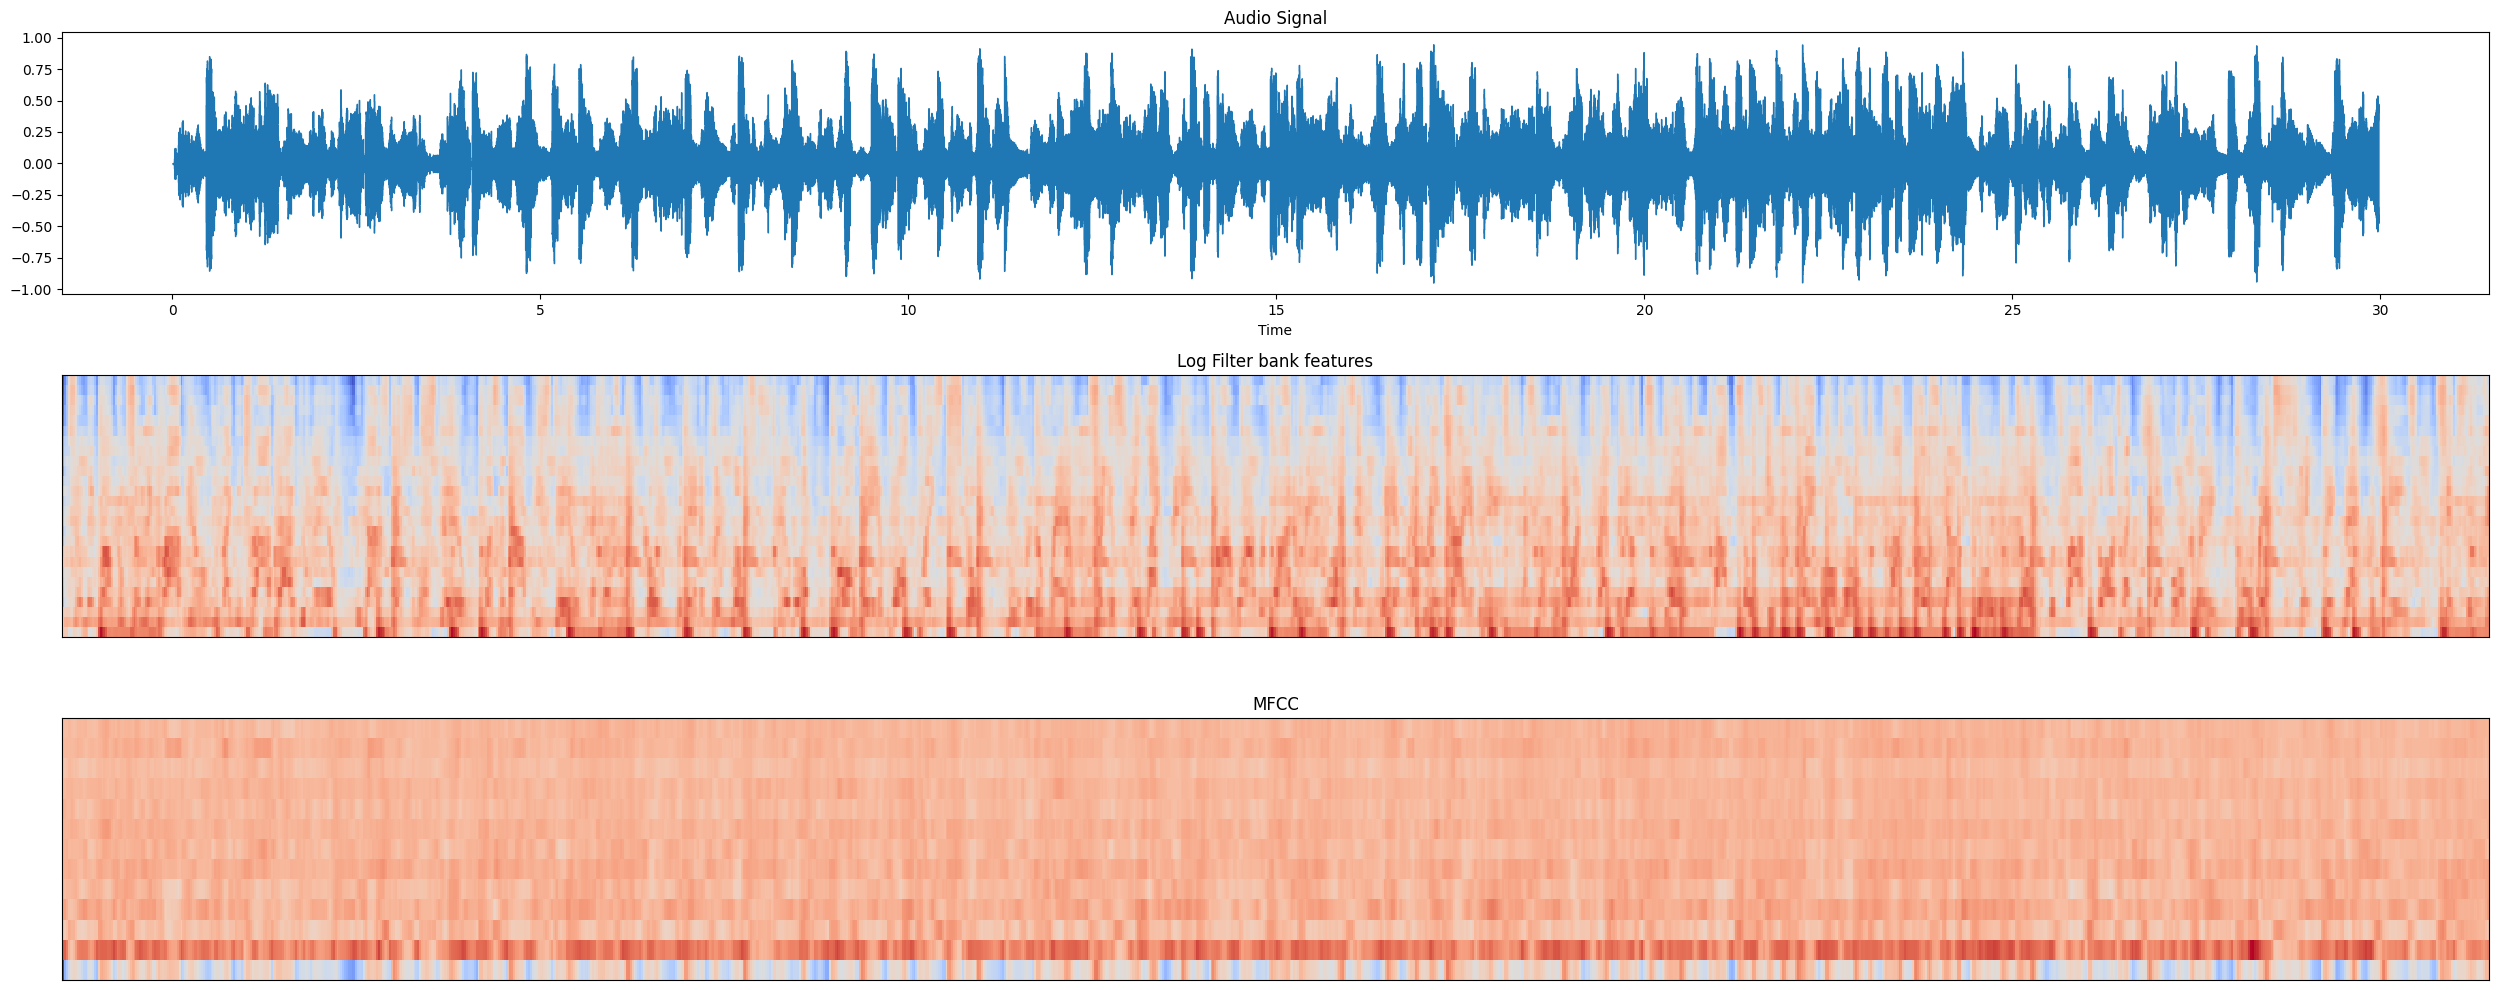

In [2]:
AUDIO_DIR = '../../dataset_process/data/fma_small'
path = fma_utils.get_audio_path(AUDIO_DIR, 2)

audio, sampling_freq = librosa.load(path)

# Extract MFCC features
mfcc_features = librosa.feature.mfcc(y=audio, sr=sampling_freq, n_mfcc=13)

# Extract filter bank features
filterbank_features = librosa.feature.melspectrogram(y=audio, sr=sampling_freq, n_mels=26)
log_filterbank_features = librosa.power_to_db(filterbank_features)

# Plot the features with bigger size
plt.figure(figsize=(25, 10))
plt.subplot(3, 1, 1)
librosa.display.waveshow(audio, sr=sampling_freq)
plt.title('Audio Signal')
plt.subplot(3, 1, 2)
librosa.display.specshow(log_filterbank_features, sr=sampling_freq)
plt.title('Log Filter bank features')
plt.subplot(3, 1, 3)
librosa.display.specshow(mfcc_features, sr=sampling_freq)
plt.title('MFCC')
plt.tight_layout()
plt.show()


In [3]:
print ('\nMFCC:\nLength of each feature =', mfcc_features.shape[0])
print ('Number of windows =', mfcc_features.shape[1])
print ('\nFilter bank:\nLength of each feature =', filterbank_features.shape[0])
print ('Number of windows =', filterbank_features.shape[1])


MFCC:
Length of each feature = 13
Number of windows = 1291

Filter bank:
Length of each feature = 26
Number of windows = 1291


In [4]:
import glob
import os.path as path

metadata_path = '../../dataset_process/data/fma_metadata/'
tracks = fma_utils.load(metadata_path + 'tracks.csv')
genres = fma_utils.load(metadata_path + 'genres.csv')
features = fma_utils.load(metadata_path + 'features.csv')
echonest = fma_utils.load(metadata_path + 'echonest.csv')

np.testing.assert_array_equal(features.index, tracks.index) # check that the index is the same


,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
2,256000,0,NaN,2008-11-26 01:48:12,2008-11-26,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
5,256000,0,NaN,2008-11-26 01:48:20,2008-11-26,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
140,128000,0,NaN,2008-11-26 01:44:07,2008-11-26,253,5,Folk,[17],[17],NaN,1593,en,Attribution-Noncommercial-No Derivative Works ...,1299,NaN,2,NaN,[],Queen Of The Wires
141,128000,0,NaN,2008-11-26 01:44:10,2008-11-26,182,1,Folk,[17],[17],NaN,839,en,Attribution-Noncommercial-No Derivative Works ...,725,NaN,4,NaN,[],Ohio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154308,320000,0,NaN,2017-03-05 04:58:50,NaT,194,2,Hip-Hop,"[21, 539, 811]","[811, 539, 21]",NaN,3371,NaN,Attribution,2705,NaN,17,NaN,"[fleslit, trap beat free use, trap beat free d...",MIA
154309,320000,0,NaN,2017-03-05 04:58:52,NaT,162,5,Hip-Hop,"[21, 539, 811]","[811, 539, 21]",NaN,4525,NaN,Attribution,3589,NaN,18,NaN,"[fleslit, trap beat free use, trap beat free d...",A1 Symphony
154413,320000,0,NaN,2017-03-07 18:46:39,NaT,349,0,Pop,[76],"[10, 76]",NaN,809,NaN,Creative Commons Attribution-NonCommercial-NoD...,676,NaN,9,NaN,[],Do Easy


(track, genre_top)
Electronic             1000
Experimental           1000
Folk                   1000
Hip-Hop                1000
Instrumental           1000
International          1000
Pop                    1000
Rock                   1000
Blues                     0
Classical                 0
Country                   0
Easy Listening            0
Jazz                      0
Old-Time / Historic       0
Soul-RnB                  0
Spoken                    0
Name: count, dtype: int64
['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Pop', 'Rock']


<Figure size 1700x500 with 0 Axes>

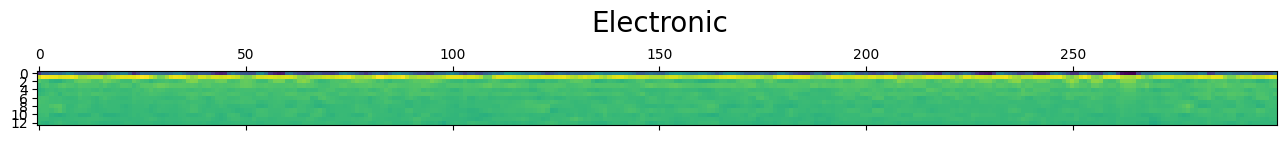

<Figure size 1700x500 with 0 Axes>

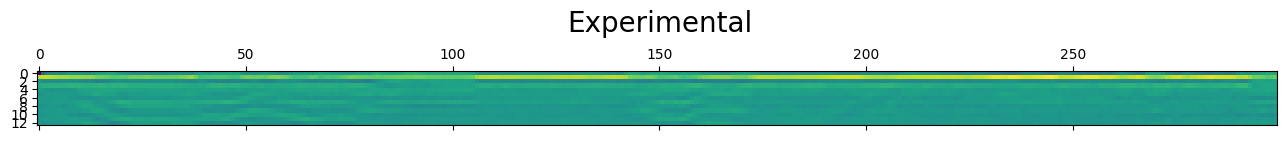

<Figure size 1700x500 with 0 Axes>

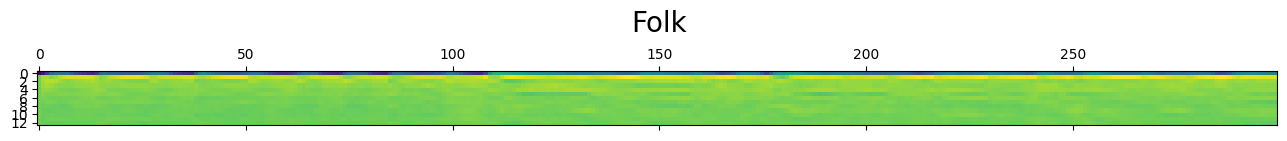

<Figure size 1700x500 with 0 Axes>

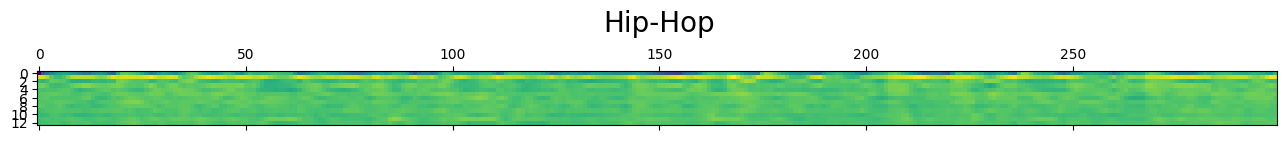

<Figure size 1700x500 with 0 Axes>

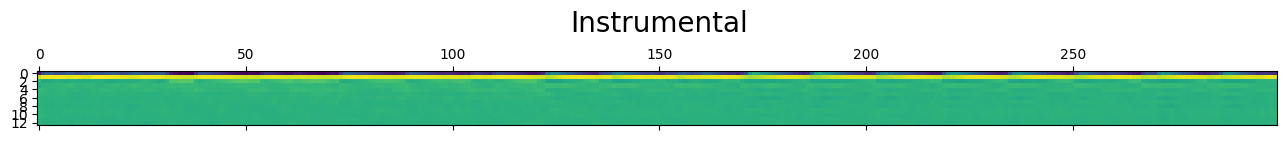

<Figure size 1700x500 with 0 Axes>

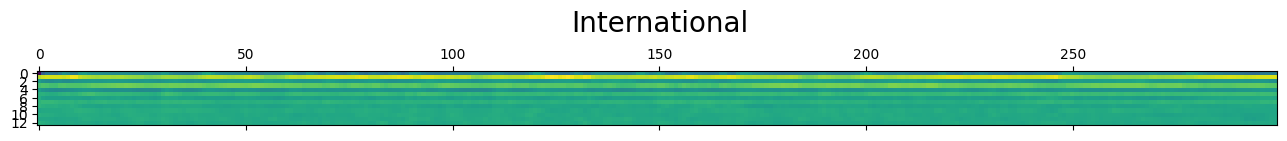

<Figure size 1700x500 with 0 Axes>

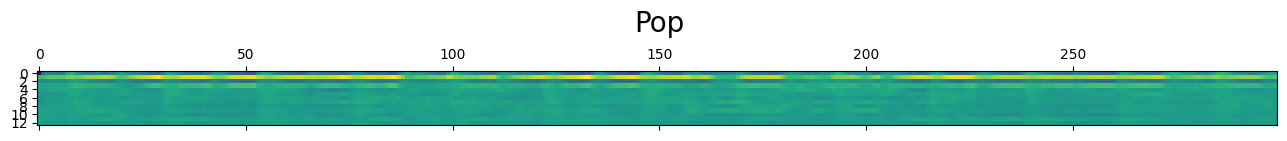

<Figure size 1700x500 with 0 Axes>

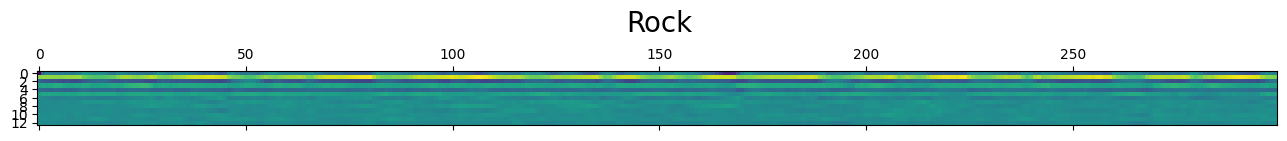

In [7]:
plt.rcParams['figure.figsize'] = (17, 5)
small_set = tracks['set', 'subset'] <= 'small'


# small set is consist of 8 genres and 8000 tracks.
# first from each genre, we select one track and visualize it.

# get the first track from each genre
tracks_small = tracks[small_set]

ipd.display(tracks_small['track'])
val_count = tracks_small['track', 'genre_top'].value_counts()

print(val_count)

# get non-zero genres and append name 
categories = []

for i in range(len(val_count)):
    if val_count.iloc[i] > 0: 
        categories.append(val_count.index[i])

print(categories)

# get the first track from each genre

for top_genre in categories:
    track_id = tracks_small[tracks_small['track', 'genre_top'] == top_genre]['track', 'genre_top'].index[0]
    path = fma_utils.get_audio_path(AUDIO_DIR, track_id)
    audio, sampling_freq = librosa.load(path)
    mfcc_features = librosa.feature.mfcc(y=audio, sr=sampling_freq, n_mfcc=13)

    plt.figure(figsize=(17, 5))
    plt.yscale = 'linear'
    plt.matshow(mfcc_features[:,:300])
    plt.text(150, -10, top_genre, horizontalalignment='center', fontsize=20)
    plt.show()


In [5]:
small = tracks['set', 'subset'] <= 'small'
genres = list(set(tracks[small]['track', 'genre_top']))


train = tracks['set', 'split'] == 'training'
validate = tracks['set', 'split'] == 'validation'
test = tracks['set', 'split'] == 'test'

X = features.loc[small, 'mfcc']
y = tracks.loc[small, ('track', 'genre_top')]

print('X:', X.shape, 'y:', y.shape)

y_train = tracks.loc[small & train, ('track', 'genre_top')]
y_test = tracks.loc[small & test, ('track', 'genre_top')]
X_train = features.loc[small & train, 'mfcc']
X_test = features.loc[small & test, 'mfcc']

print('X_train:', X_train.shape, 'y_train:', y_train.shape)
print('X_test:', X_test.shape, 'y_test:', y_test.shape)

ipd.display(y_train.head())
ipd.display(X_train.head())

genres

X: (8000, 140) y: (8000,)
X_train: (6400, 140) y_train: (6400,)
X_test: (800, 140) y_test: (800,)


track_id
2      Hip-Hop
5      Hip-Hop
10         Pop
140       Folk
141       Folk
Name: (track, genre_top), dtype: category
Categories (16, object): ['Blues', 'Classical', 'Country', 'Easy Listening', ..., 'Pop', 'Rock', 'Soul-RnB', 'Spoken']

statistics  kurtosis                                                    \
number            01        02        03        04        05        06   
track_id                                                                 
2           3.856789  1.541901  0.000816  0.330728  0.118731 -0.342687   
5           2.624517  2.415293  0.440233 -0.782131 -0.771069 -0.724216   
10          5.076893  1.161854  2.095651  1.372743 -0.203574 -0.345354   
140         0.384906  1.203378  0.429393  0.639471 -0.080144 -0.440946   
141        -0.038922  4.771146 -0.378949 -0.309047 -0.661308 -0.531602   

statistics                                          ...        std            \
number            07        08        09        10  ...         11        12   
track_id                                            ...                        
2          -0.259252  0.146735  0.410656 -0.162872  ...  10.059609  8.601942   
5           0.090260  0.152119  0.261731 -0.608905  ...   8.863638  9.581952   
10         -0.529139  0.561974  0.281350 -0.150672  ...   8.289734  7.985110   
140        -0.432567 -0.126163  0.507695  0.408915  ...   9.883532  8.250456   
141         0.029186  0.662524 -0.084562  0.965640  ...   9.464321  8.119837   

statistics                                                              \
number            13        14        15        16        17        18   
track_id                                                                 
2           9.284250  9.245516  8.520863  8.560472  7.651871  7.246555   
5           8.895723  8.141456  8.201844  7.780963  7.132692  7.539753   
10          7.075400  6.972649  7.071393  7.270959  7.051070  6.928591   
140         8.085891  8.114858  8.832722  8.157245  7.297486  7.734456   
141         8.918522  8.059117  9.339061  8.451561  8.426965  8.341757   

statistics                      
number            19        20  
track_id                        
2           7.077188  7.391859  
5           8.452527  7.334442  
10          6.430473  6.186294  
140         7.807103  7.986255  
141         8.572934  9.351485  

[5 rows x 140 columns]

['Rock',
 'Pop',
 'Hip-Hop',
 'International',
 'Electronic',
 'Experimental',
 'Folk',
 'Instrumental']

In [6]:
# train model for each genre
X_train_genre = []
y_train_genre = []
# ipd.display(y_train.head())
# ipd.display(X_train.head())
for genre in genres:
    X_train_genre.append(X_train[y_train == genre])
    y_train_genre.append(y_train[y_train == genre])

X_test_genre = []
y_test_genre = []
for genre in genres:
    X_test_genre.append(X_test[y_test == genre])
    y_test_genre.append(y_test[y_test == genre])

for i in range(len(genres)):
    print(genres[i], X_train_genre[i].shape, y_train_genre[i].shape)

ipd.display(X_train_genre[4])
ipd.display(y_train_genre[2])


Rock (800, 140) (800,)
Pop (800, 140) (800,)
Hip-Hop (800, 140) (800,)
International (800, 140) (800,)
Electronic (800, 140) (800,)
Experimental (800, 140) (800,)
Folk (800, 140) (800,)
Instrumental (800, 140) (800,)


statistics   kurtosis                                                    \
number             01        02        03        04        05        06   
track_id                                                                  
1482        -0.644887 -0.233919 -0.714554  0.636144 -0.160742  0.537335   
3573        10.125261  0.093983  2.308056  1.284597  1.410804  1.363736   
4519         2.012013  2.746597  0.001455 -0.499918 -0.345734 -0.452758   
4520        -0.140912  0.160478 -0.421729 -0.978681 -0.105093 -0.139288   
4521        -0.179765  0.044659  0.719022 -0.508729 -0.270135  0.003189   
...               ...       ...       ...       ...       ...       ...   
148773       4.210111 -0.446031  0.001766 -0.015341 -0.050688 -0.225333   
149185       1.555200 -0.285141 -0.034515  0.341193  1.157600 -0.637426   
149700      -0.336470  0.113538 -0.878114 -0.336782 -0.975287 -0.437158   
149701      -0.492924 -0.648219 -0.240120 -0.091138 -0.754781 -0.077480   
151404       2.118609  0.369037  0.254961  1.128160 -0.087846 -0.076661   

statistics                                          ...        std             \
number            07        08        09        10  ...         11         12   
track_id                                            ...                         
1482        0.040445  0.156447  0.373159  0.904510  ...   7.859650   7.879481   
3573        0.986432  1.630756  0.805928  2.310010  ...   6.851094   6.418388   
4519       -0.077804 -0.184950 -0.366681  0.324271  ...   9.300886   8.324423   
4520        0.089011  0.002046 -0.086089 -0.006052  ...   9.696405   8.334823   
4521       -0.085248  0.030552  0.054555  0.199022  ...  10.049246   8.141929   
...              ...       ...       ...       ...  ...        ...        ...   
148773     -0.136169  0.359088  0.252200 -0.012159  ...   8.654917   9.073426   
149185      0.666621 -0.573787  0.412704 -0.629398  ...   8.479147  13.152939   
149700     -0.377653  0.079537 -0.251644  0.322629  ...   9.920640   9.308875   
149701      0.345180 -0.067624  0.143008  0.243183  ...  12.249997   9.718785   
151404     -0.068091  0.132218  0.157072  0.225938  ...  11.291241   8.876500   

statistics                                                                \
number            13         14        15         16        17        18   
track_id                                                                   
1482        8.319845   9.055964  7.579121   7.537182  8.692874  9.681196   
3573        6.696506   6.024953  5.707410   5.578782  6.108066  6.064326   
4519        8.767540   7.537132  7.573388   7.463031  7.699706  6.973097   
4520        7.508722   7.237683  7.619370   8.121473  8.027369  7.335586   
4521        8.328770   7.323808  7.013156   7.189534  6.738860  6.696622   
...              ...        ...       ...        ...       ...       ...   
148773      8.712290   8.448555  8.831626   8.167114  7.480341  7.633024   
149185      9.795942  11.076400  9.355699  10.282989  7.636364  9.394041   
149700      9.980226   9.367155  8.609719   7.511640  6.703424  6.410068   
149701      9.125276  10.274629  8.857085   8.804460  8.259324  8.944986   
151404      9.840465   8.094713  9.156003   8.298412  7.309298  7.068728   

statistics                        
number             19         20  
track_id                          
1482        10.265250  10.581942  
3573         5.860878   5.855461  
4519         6.998193   6.988114  
4520         7.105143   6.656917  
4521         6.103039   6.440685  
...               ...        ...  
148773       7.576497   7.718922  
149185       8.938636  10.304180  
149700       6.904134   6.249156  
149701      10.229912   7.875843  
151404       6.842793   7.309986  

[800 rows x 140 columns]

track_id
2         Hip-Hop
5         Hip-Hop
676       Hip-Hop
694       Hip-Hop
695       Hip-Hop
           ...   
149953    Hip-Hop
152543    Hip-Hop
152545    Hip-Hop
153337    Hip-Hop
155066    Hip-Hop
Name: (track, genre_top), Length: 800, dtype: category
Categories (16, object): ['Blues', 'Classical', 'Country', 'Easy Listening', ..., 'Pop', 'Rock', 'Soul-RnB', 'Spoken']

In [1]:
import hmm_trainer as hmm_trainer
import tqdm as tqdm
# train model for each genre

hist = []
while True:
    models = []


    for i in tqdm.tqdm(range(len(genres))):
        
        model = hmm_trainer.HMMTrainer(model_name='GaussianHMM', n_component=3)
        # get mfcc features for each genr in training set
        feature = np.array(X_train_genre[i]).reshape(-1, 1)
        model.train(feature)
        models.append((genres[i], model))

    # test model for each model and select the best one as its genre
    y_pred = []
    for i in range(len(X_test)):
        best_score = float('-inf')
        pred_genre = None
        for j in range(len(genres)):
            feature = np.array(X_test.iloc[i]).reshape(-1, 1)
            score = models[j][1].get_score(feature)
            if score > best_score:
                best_score = score
                pred_genre = models[j][0]
        y_pred.append(pred_genre)

    # calculate accuracy
    accuracy = sum(y_pred == y_test) / len(y_test)
    print('accuracy:', accuracy)
    hist.append(y_pred)
    cnf_matrix = confusion_matrix(y_test, y_pred, labels=genres)
    # the accuracy for each genre should be no less than 0.25
    ok = True
    for i in range(len(genres)):
        if cnf_matrix[i][i] / sum(cnf_matrix[i]) < 0.125:
            ok = False
    if ok:
        break

accuracy

NameError: name 'genres' is not defined

In [19]:
import hmm_trainer as hmm_trainer
import tqdm as tqdm


models = []


for i in range(len(genres)):
    
    model = hmm_trainer.HMMTrainer(model_name='GaussianHMM', n_component=4, n_iter=1000)
    mfcc_features = np.array([])

    # os.walk(AUDIO_DIR)
    # count = 0
    # for root, dirs, files in tqdm.tqdm(os.walk(AUDIO_DIR)):
    #     for file in files:
    #         if file.endswith('.mp3'):
    #             path = os.path.join(root, file)
    #             track_id = int(path.split('\\')[-1].split('.')[0])
    #             if tracks.loc[track_id, ('track', 'genre_top')] != genres[i]:
    #                 continue
    #             if tracks.loc[track_id, ('set', 'split')] != 'training':
    #                 continue

    #             count = count + 1
    #             # print(path)
    #             try:
    #                 audio, sampling_freq = librosa.load(path)
    #             except:
    #                 print('error:', path)
    #                 continue

    #             # preocess 10 seconds of audio
    #             audio = audio[:29 * sampling_freq]
    #             # print(librosa.feature.mfcc(y=audio, sr=sampling_freq, n_mfcc=13).shape)
    #             if len(mfcc_features) == 0:
    #                 mfcc_features = librosa.feature.mfcc(y=audio, sr=sampling_freq, n_mfcc=13)
    #             else :
    #                 mfcc_features = np.append(mfcc_features, librosa.feature.mfcc(y=audio, sr=sampling_freq, n_mfcc=13), axis=0)

    # load mfcc features
    mfcc_features = np.load('mfcc_features_' + genres[i] + '.npy')
    # print(count, genres[i])
    print(mfcc_features.shape)
    # save the features
    # np.save('mfcc_features_' + genres[i] + '.npy', mfcc_features)

    model.train(mfcc_features)
    models.append((genres[i], model))
    model = None



(10400, 431)
(10400, 431)
(10400, 431)
(10400, 431)
(10400, 431)
(10400, 431)
(10400, 431)
(10400, 431)


In [21]:
# test model for each model and select the best one as its genre
y_pred = []
for i in tqdm.tqdm(range(len(X_test))):
    best_score = float('-inf')
    pred_genre = None

    # get the mfcc features of the test track
    path = fma_utils.get_audio_path(AUDIO_DIR, X_test.index[i])
    true_genre = y_test.iloc[i]
    assert true_genre == tracks.loc[X_test.index[i], ('track', 'genre_top')]
    audio, sampling_freq = librosa.load(path)
    audio = audio[:10 * sampling_freq]
    mfcc_features = librosa.feature.mfcc(y=audio, sr=sampling_freq, n_mfcc=13)

    for label, model in models:
        score = model.get_score(mfcc_features)
        if score > best_score:
            best_score = score
            pred_genre = label
    y_pred.append(pred_genre)

# calculate accuracy
accuracy = sum(y_pred == y_test) / len(y_test)
print('accuracy:', accuracy)

accuracy

100%|██████████| 800/800 [00:53<00:00, 14.92it/s]

accuracy: 0.1775


0.1775

#### vaildation

In [ ]:

best_accuracy = 0
best_n_component = None
best_pred = None
n_component_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  

for n_component in n_component_values:
    models = []
    for i in tqdm.tqdm(range(len(genres))):
        
        model = hmm_trainer.HMMTrainer(model_name='GaussianHMM', n_component=n_component)
        feature = np.array(X_train_genre[i]).reshape(-1, 1)
        model.train(feature)
        models.append((genres[i], model))

    # test model for each model and select the best one as its genre
    y_pred = []
    for i in range(len(X_test)):
        best_score = float('-inf')
        pred_genre = None
        for j in range(len(genres)):
            feature = np.array(X_test.iloc[i]).reshape(-1, 1)
            score = models[j][1].get_score(feature)
            if score > best_score:
                best_score = score
                pred_genre = models[j][0]
        y_pred.append(pred_genre)

        
    accuracy = sum(y_pred == y_test) / len(y_test)
    if accuracy > best_accuracy:
        best_n_component = n_component
        best_accuracy = accuracy
        best_pred = y_pred

# calculate accuracy
best_accuracy, best_n_component


In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.43 0.05 0.13 0.12 0.06 0.06 0.03 0.12]
 [0.29 0.02 0.17 0.14 0.31 0.05 0.01 0.01]
 [0.04 0.   0.47 0.06 0.4  0.01 0.   0.02]
 [0.13 0.03 0.14 0.43 0.1  0.06 0.   0.11]
 [0.08 0.   0.16 0.06 0.48 0.12 0.01 0.09]
 [0.15 0.01 0.06 0.18 0.23 0.1  0.04 0.23]
 [0.16 0.09 0.   0.35 0.06 0.14 0.   0.2 ]
 [0.07 0.02 0.06 0.19 0.05 0.1  0.01 0.5 ]]


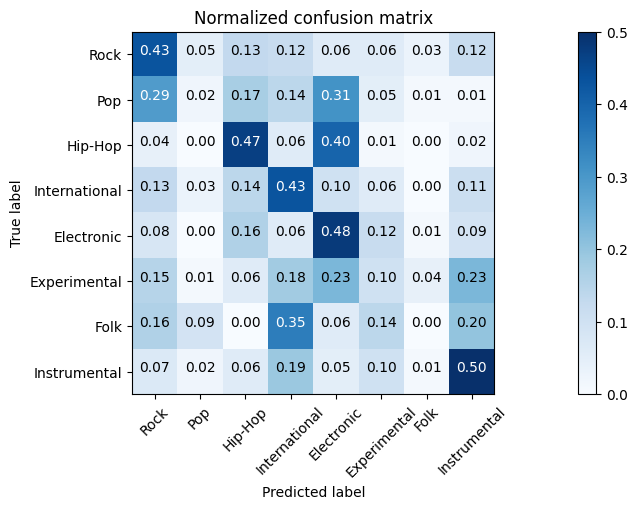

In [48]:
for y_pred in hist:
    if sum(y_pred == y_test) / len(y_test) < 0.30:
        continue
    best_pred = y_pred
    cnf_matrix = confusion_matrix(y_test, y_pred, labels=genres)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=genres, normalize=True,
                        title='Normalized confusion matrix')


Normalized confusion matrix
[[0.8  0.02 0.03 0.1  0.02 0.02 0.   0.01]
 [0.28 0.   0.16 0.29 0.27 0.   0.   0.  ]
 [0.18 0.   0.42 0.12 0.27 0.01 0.   0.  ]
 [0.17 0.   0.04 0.73 0.06 0.   0.   0.  ]
 [0.27 0.   0.22 0.12 0.38 0.01 0.   0.  ]
 [0.29 0.01 0.12 0.33 0.21 0.02 0.01 0.01]
 [0.42 0.   0.01 0.54 0.03 0.   0.   0.  ]
 [0.26 0.   0.06 0.66 0.02 0.   0.   0.  ]]


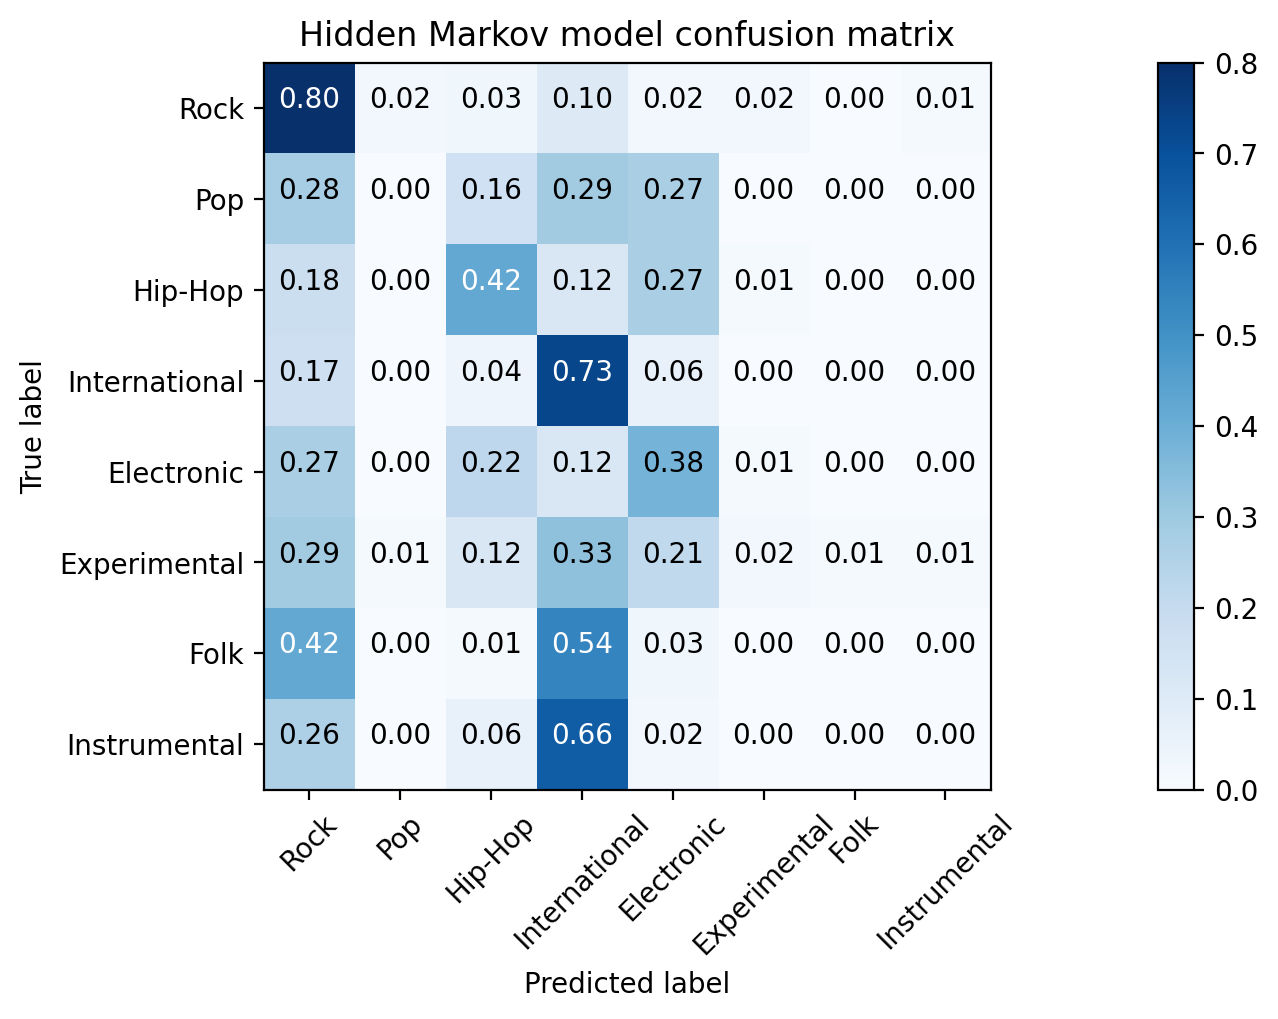

<Figure size 1700x500 with 0 Axes>

In [29]:
# plot confusion matrix

cnf_matrix = confusion_matrix(y_test, y_pred, labels=genres)
plt.figure(dpi=200)
plot_confusion_matrix(cnf_matrix, classes=genres, normalize=True,
                      title='Hidden Markov model confusion matrix')
plt.show()
plt.savefig('hmm_confusion_matrix.png')

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[3, 3, 3, 3, 3, 1, 3, 4, 5, 0, 0, 0, 0, 0, 0, 7, 5, 0, 0, 0, 7, 0, 5, 0, 4, 5, 5, 0, 0, 0, 2, 3, 2, 7, 4, 6, 7, 5, 6, 4, 5, 5, 4, 4, 4, 7, 1, 6, 5, 6, 6, 5, 6, 1, 5, 5, 1, 5, 1, 5, 7, 1, 5, 3, 5, 5, 0, 6, 5, 5, 4, 5, 4, 5, 4, 5, 5, 5, 5, 7, 5, 7, 1, 4, 1, 4, 0, 0, 0, 1, 4, 5, 5, 4, 7, 4, 0, 5, 1, 6, 5, 0, 5, 0, 0, 5, 7, 5, 7, 1, 1, 0, 7, 0, 3, 5, 4, 4, 4, 5, 3, 1, 7, 7, 7, 0, 7, 5, 7, 7, 7, 7, 7, 7, 4, 5, 6, 7, 0, 7, 0, 3, 6, 7, 0, 7, 7, 7, 0, 0, 0, 0, 7, 0, 3, 7, 1, 6, 0, 3, 5, 4, 4, 5, 7, 0, 0, 7, 3, 0, 5, 7, 7, 4, 0, 4, 7, 0, 0, 4, 4, 5, 1, 1, 3, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 7, 5, 5, 5, 5, 5, 3, 5, 5, 5, 6, 5, 5, 5, 1, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 7, 1, 7, 0, 0, 5, 6, 5, 5, 7, 4, 4, 1, 5, 1, 7, 1, 1, 1, 7, 7, 5, 7, 3, 0, 5, 0, 3, 5, 5, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 0, 3, 4, 1, 0, 3, 0, 2, 4, 2, 1, 7, 5, 4, 0, 1, 5, 5, 

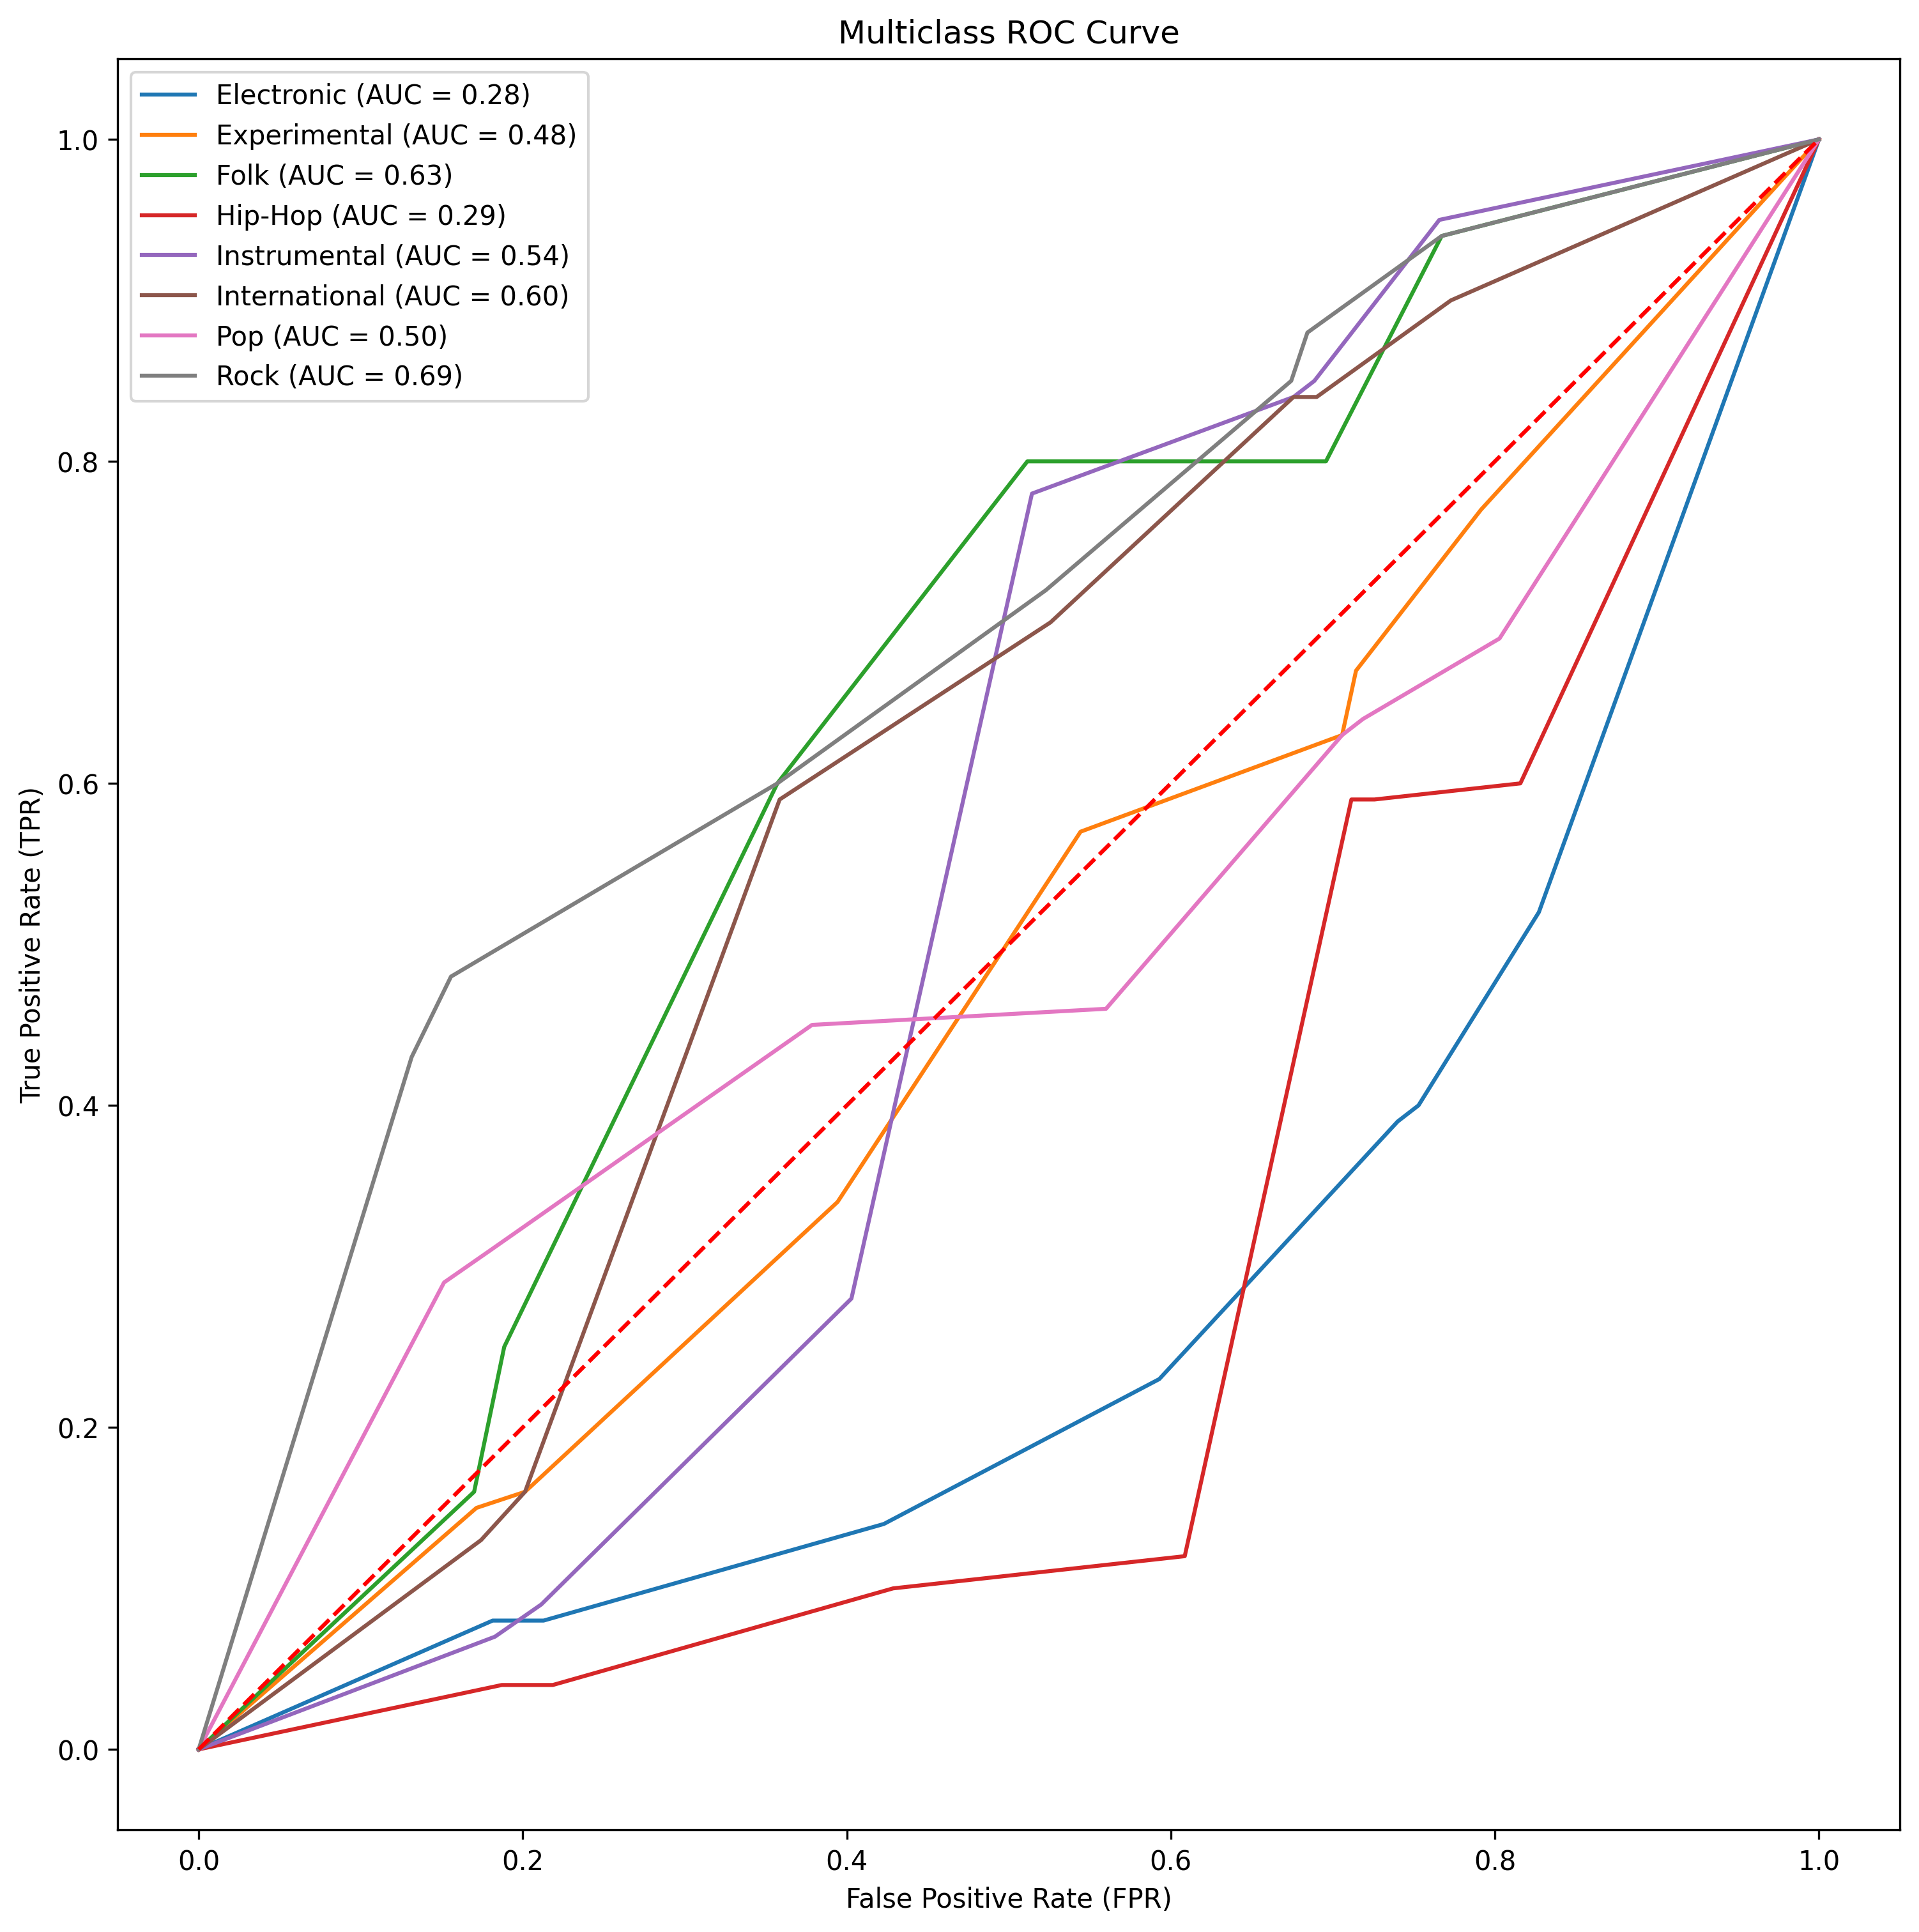

In [49]:
# plot auc and roc
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

fpr = dict()
tpr = dict()
roc_auc = dict()

label_mapping = {'Electronic': 0, 'Experimental': 1, 'Folk': 2, 'Hip-Hop': 3,
                 'Instrumental': 4, 'International': 5, 'Pop': 6, 'Rock': 7}

y_test_numeric = np.array([label_mapping[label] for label in y_test])
y_test_binary = label_binarize(y_test_numeric, classes=list(label_mapping.values()))


y_pred_proba = [label_mapping[label] for label in best_pred]

print(y_test_binary)
print(y_pred_proba)

for i in range(len(label_mapping)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_proba)
    roc_auc[i] = auc(fpr[i], tpr[i])
    




plt.figure(figsize=(12, 12), dpi=300)
for label in label_mapping:
    plt.plot(fpr[label_mapping[label]], tpr[label_mapping[label]],
             label=f'{label} (AUC = {roc_auc[label_mapping[label]]:.2f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.show()

In [34]:
subset = tracks.index[tracks['set', 'subset'] <= 'small']
assert subset.isin(tracks.index).all()
assert subset.isin(features.index).all()

features_all = features.join(echonest, how='inner').sort_index(axis=1)
print('Not enough Echonest features: {}'.format(features_all.shape))

tracks = tracks.loc[subset]
features_all = features.loc[subset]

tracks.shape, features_all.shape

Not enough Echonest features: (13129, 767)


((8000, 52), (8000, 518))

In [35]:
train = tracks.index[tracks['set', 'split'] == 'training']
val = tracks.index[tracks['set', 'split'] == 'validation']
test = tracks.index[tracks['set', 'split'] == 'test']

print('{} training examples, {} validation examples, {} testing examples'.format(*map(len, [train, val, test])))

genres = list(LabelEncoder().fit(tracks['track', 'genre_top']).classes_)
#genres = list(tracks['track', 'genre_top'].unique())
print('Top genres ({}): {}'.format(len(genres), genres))
genres = list(MultiLabelBinarizer().fit(tracks['track', 'genres_all']).classes_)
print('All genres ({}): {}'.format(len(genres), genres))

6400 training examples, 800 validation examples, 800 testing examples
Top genres (8): ['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Pop', 'Rock']
All genres (114): [1, 2, 6, 10, 12, 15, 16, 17, 18, 21, 22, 25, 26, 27, 30, 31, 32, 33, 36, 38, 41, 42, 45, 46, 47, 49, 53, 58, 64, 66, 70, 71, 76, 77, 79, 81, 83, 85, 86, 88, 89, 90, 92, 94, 98, 100, 101, 102, 103, 107, 109, 111, 113, 117, 118, 125, 130, 167, 171, 172, 174, 177, 180, 181, 182, 183, 184, 185, 186, 214, 224, 232, 236, 240, 247, 250, 267, 286, 296, 297, 314, 337, 359, 360, 361, 362, 400, 401, 404, 439, 440, 456, 468, 491, 495, 502, 504, 514, 524, 538, 539, 542, 580, 602, 619, 695, 741, 763, 808, 811, 1032, 1060, 1193, 1235]


In [36]:
def pre_process(tracks, features, columns, multi_label=False, verbose=False):
    if not multi_label:
        # Assign an integer value to each genre.
        enc = LabelEncoder()
        labels = tracks['track', 'genre_top']
        #y = enc.fit_transform(tracks['track', 'genre_top'])
    else:
        # Create an indicator matrix.
        enc = MultiLabelBinarizer()
        labels = tracks['track', 'genres_all']
        #labels = tracks['track', 'genres']

    # Split in training, validation and testing sets.
    y_train = enc.fit_transform(labels[train])
    y_val = enc.transform(labels[val])
    y_test = enc.transform(labels[test])
    X_train = features.loc[train, columns].values
    X_val = features.loc[val, columns].values
    X_test = features.loc[test, columns].values
    
    X_train, y_train = shuffle(X_train, y_train, random_state=42)
    
    # Standardize features by removing the mean and scaling to unit variance.
    scaler = StandardScaler(copy=False)
    scaler.fit_transform(X_train)
    scaler.transform(X_val)
    scaler.transform(X_test)
    
    return y_train, y_val, y_test, X_train, X_val, X_test

In [37]:
y_train, y_val, y_test, X_train, X_val, X_test = pre_process(tracks, features_all, ['mfcc'], True)
y_train.shape, X_train.shape

((6400, 114), (6400, 140))